# Questão 05 - Lista 1 - Verificando flutuações nos parâmetros

In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy import stats
import pandas as pd
import latex


# Descomente as linhas baixo para ter formatação em Latex em seus gráficos.
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = 'Times'
#rcParams['svg.fonttype'] = 'none'
#plt.rc('text',usetex=True) 


import matplotlib as mpl 




#mpl.rcParams['figure.dpi'] = 400 

## a)

A curva de regressão verdadeira: 

\begin{equation}
Y = 3 + 5 X + \varepsilon, \mbox{ with } \varepsilon \sim \mathcal{N}(0,4).
\label{eq1}\tag{1}
\end{equation}


Passos do experimento: 

1. Amostrar pontos da Eq.(\ref{eq1}). 

2. Estimar $\hat{\beta}_0$ e $\hat{\beta}_1$, calcular suas médias empíricas e desvios padrão e comparar com os verdadeiros, $\beta_0=3$ and $\beta_1=5$. 

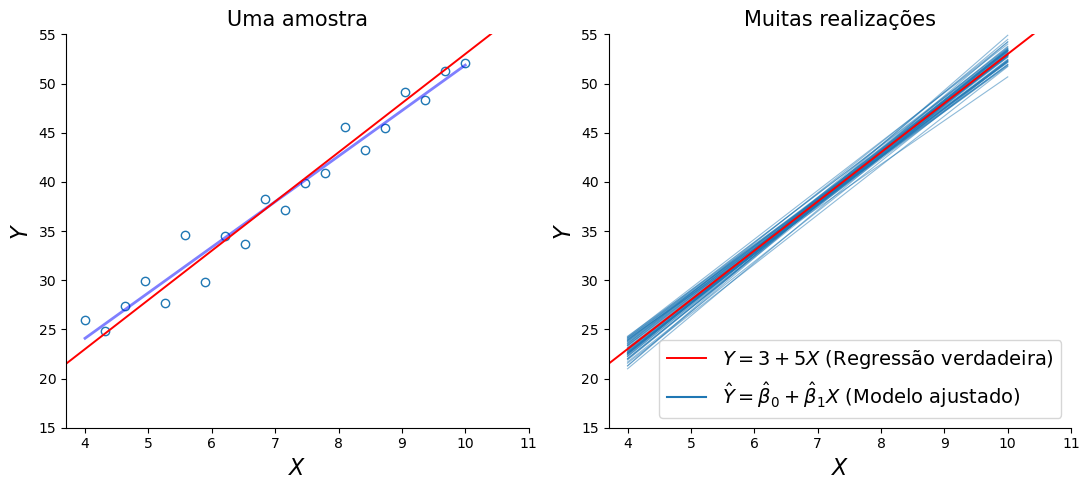

In [3]:
number_experiments = 50
N = 20 # number of samples in each experiment

fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#cria um vetor vazio para guardar os estimadores obtidos em cada um dos experimentos
b0_hat = []
b1_hat = []

for exp in range(number_experiments):


    eps = np.random.normal(0,2,N) # ruido.

    xfinal = 10
    xinit = 4
    intercepto = 3
    slope = 5

    X = np.linspace(xinit,xfinal,N)

    # Population model - the true relationship in the data.
    Y = intercepto + slope*X + eps

    fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
    x = np.linspace(np.min(X),np.max(X),100) # x para plotar a reta ajustada.
    y_model = fit.intercept + fit.slope*x # reta ajustadas.

    #guarda cada um dos estimadores de cada experimento
    b0_hat.append(fit.intercept)
    b1_hat.append(fit.slope)

    ax2.plot(x,y_model,'-',color='C0',linewidth=0.8,alpha=0.5)
    ax2.set_xlabel(r'$X$',fontsize=16)
    ax2.set_ylabel(r'$Y$',fontsize=16)

### The true regression line ###
xlin = np.linspace(-2+ xinit,xfinal+2,100) # x data for the theoretical line.
ytrue = intercepto + slope*xlin


### one realization as example ###
ax1.set_title(r'Uma amostra',fontsize=15)
ax1.plot(X,Y,'o',markerfacecolor='white')
ax1.plot(x,y_model,'-',color='b',linewidth=2,alpha=0.5)
ax1.set_xlabel(r'$X$',fontsize=16)
ax1.set_ylabel(r'$Y$',fontsize=16)
ax1.plot(xlin,ytrue,'-',color='red',linewidth=1.4,label=r'$Y = 3 + 5X$ (Regressão verdadeira)')
ax1.plot([],[],'-',color='C0',label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Modelo ajustado)')
ax2.set_title(r'Muitas realizações',fontsize=15)


ax2.plot(xlin,ytrue,'-',color='red',linewidth=1.4,label=r'$Y = 3 + 5X$ (Regressão verdadeira)')
ax2.plot([],[],'-',color='C0',label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Modelo ajustado)')


ax2.legend(loc='lower right',fontsize=14)

for ax in fig.get_axes():

    ax.set_xlim([3.7,11])
    ax.set_ylim([15,55])


    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)




plt.tight_layout()
plt.show()


In [4]:
#média empı́rica e desvios padrão de β̂0,1
print('       real mean std')
print('b1_hat: 5.0', round(np.mean(b1_hat),1) ,'', round(np.std(b1_hat),1))
print('b0_hat: 3.0', round(np.mean(b0_hat),1) ,'', round(np.std(b0_hat),1))

       real mean std
b1_hat: 5.0 5.0  0.2
b0_hat: 3.0 2.9  1.7


## b)

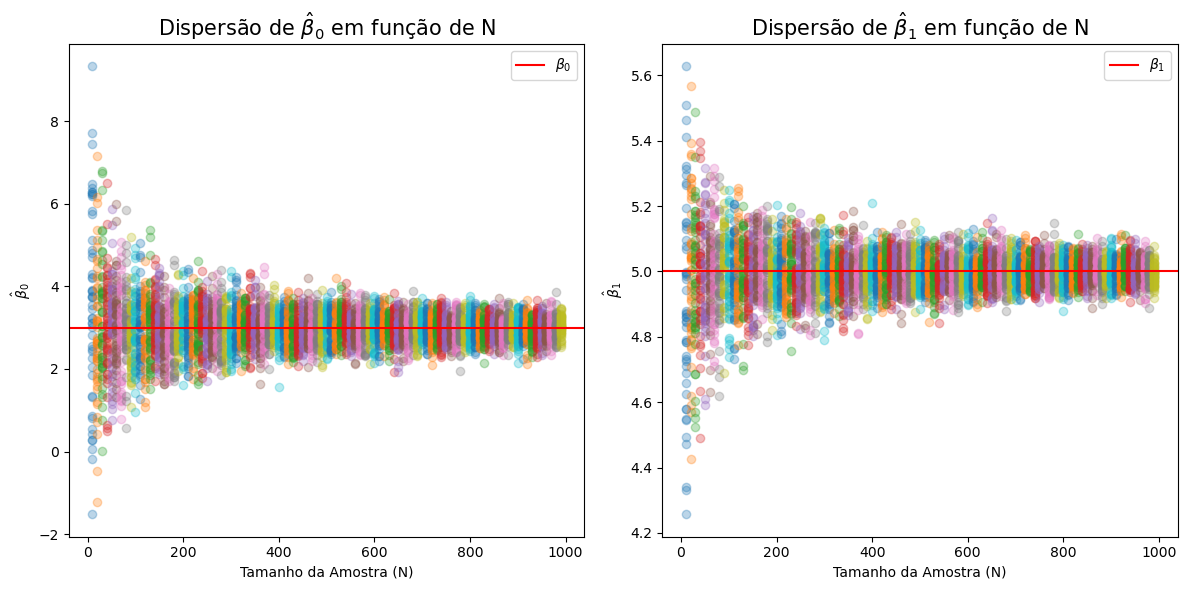

In [7]:
number_experiments = 50
N = np.arange(10, 1000, 10) # numeros de amostras em cada experimento

b0_hat = []
b1_hat = []

for n in N:
    
    b0_samples = []
    b1_samples = []
    
    for i in range(number_experiments):

        eps = np.random.normal(0,2,n) # ruido. 

        xfinal = 10
        xinit = 4
        intercepto = 3
        slope = 5

        X = np.linspace(xinit,xfinal,n)

        # Population model - the true relationship in the data.
        Y = intercepto + slope*X + eps

        # Ajustar modelo de regressão linear
        fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
        b0_samples.append(fit.intercept)  # Intercepto estimado
        b1_samples.append(fit.slope)  # Coeficiente estimado
    
    # Armazenar os coeficientes estimados para cada experimento de cada tamanho de amostra
    b0_hat.append(b0_samples)
    b1_hat.append(b1_samples)
    
    
# Plot da dispersão dos valores
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title(r'Dispersão de $\hat{\beta}_0$ em função de N',fontsize=15)
for i, n in enumerate(N):
    plt.scatter([n] * number_experiments, b0_hat[i], alpha=0.3)
plt.axhline(intercepto, color='red', label=r'$\beta_0$')
plt.xlabel('Tamanho da Amostra (N)')
plt.ylabel(r'$\hat{\beta}_0$')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_title(r'Dispersão de $\hat{\beta}_1$ em função de N',fontsize=15)
for i, n in enumerate(N):
    plt.scatter([n] * number_experiments, b1_hat[i], alpha=0.3)
plt.axhline(slope, color='red', label=r'$\beta_1$')
plt.xlabel('Tamanho da Amostra (N)')
plt.ylabel(r'$\hat{\beta}_1$')
plt.legend()

plt.tight_layout()
plt.show()

Nota-se que para tamanhos de amostra pequenos os estimadores assumem valores mais voláteis, distantes do valor real, e, conforme aumenta-se o tamanho da amostra (N), os valores estimados tendem a se aproximar dos valores verdadeiros.

## c)

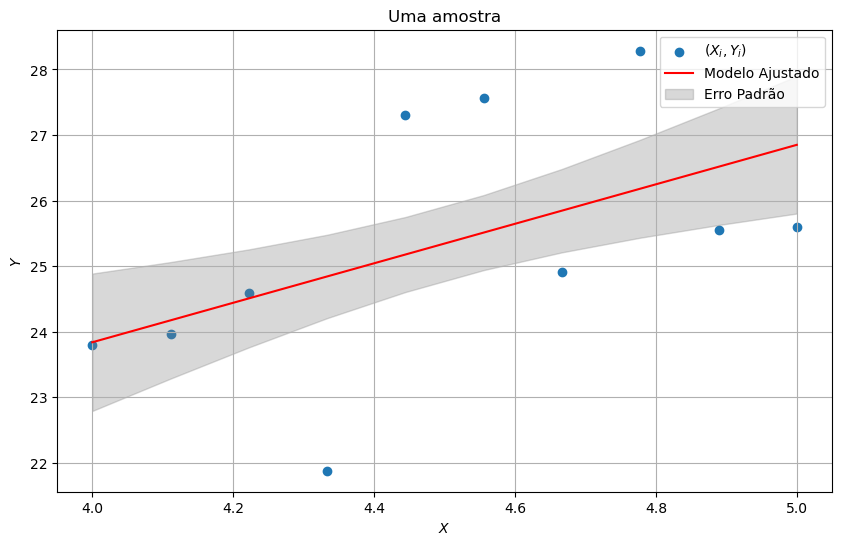

In [5]:
N = 10 # number of samples

eps = np.random.normal(0,2,N) # ruido.

xfinal = 5
xinit = 4
intercepto = 3
slope = 5
    
X = np.linspace(xinit,xfinal,N)

# Population model - the true relationship in the data.
Y = intercepto + slope*X + eps

fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
x = np.linspace(np.min(X),np.max(X),N) # x para plotar a reta ajustada.
y_model = fit.intercept + fit.slope*x # reta ajustadas.

erro = sqrt((np.sum((Y - y_model)**2)/(N-2)) * \
            ((1/N) + (((x-np.mean(x))**2)/(np.sum(x*x)-N*np.mean(x)*np.mean(x)) )))


# Bandas de erro padrão para a visualização
upper_bound = y_model + erro
lower_bound = y_model - erro

# Plotar os dados, modelo ajustado e bandas de erro padrão
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label=r'$(X_i, Y_i)$')
plt.plot(x,y_model, label='Modelo Ajustado', color='red')
plt.fill_between(X, upper_bound, lower_bound, color='gray', alpha=0.3, label='Erro Padrão')
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend()
plt.title('Uma amostra')
plt.grid(True)
plt.show()


## d)

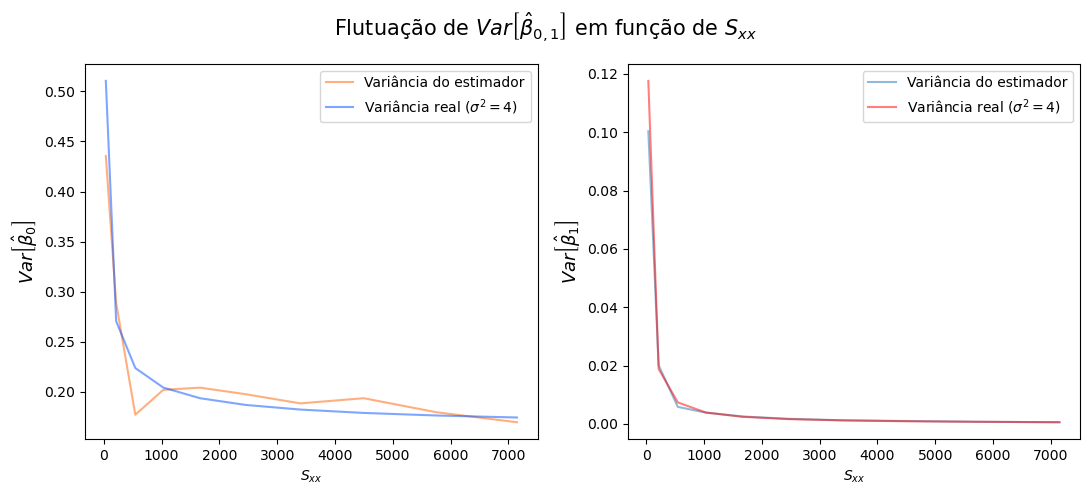

In [25]:
number_experiments = 10
N = 100 # tamanho de amostra maior para facilitar a visualização de var_b1_hat

all_var_b0_hat = []
all_var_b1_hat = []
all_sxx = []

real_var_b0 = []
real_var_b1 = []

for i in range(number_experiments):
    
    eps = np.random.normal(0,2,N) # ruido.

    xfinal = 3*(i+1)
    xinit = 1
    intercepto = 3
    slope = 5
    
    for exp in range(number_experiments):

        X = np.linspace(xinit,xfinal,N)

        # Population model - the true relationship in the data.
        Y = intercepto + slope*X + eps

        fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
        x = np.linspace(np.min(X),np.max(X),N) # x para plotar a reta ajustada.
        y_model = fit.intercept + fit.slope*x # reta ajustadas.

        sxx = np.sum(X**2)-N*np.mean(X)*np.mean(X)
        var_b0_hat = (np.sum((Y - y_model)**2)/(N-2)) * ((1/N) + ((np.mean(x)**2)/sxx))
        var_b1_hat = (np.sum((Y - y_model)**2))/((N-2)*sxx)

        real_var_b0.append(4*((1/N) + ((np.mean(x)**2)/sxx)))
        real_var_b1.append(4/sxx)

        all_sxx.append(sxx)
        all_var_b0_hat.append(var_b0_hat)
        all_var_b1_hat.append(var_b1_hat)
 


fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


plt.suptitle(r'Flutuação de $Var\left[\hat{\beta}_{0,1}\right]$ em função de $S_{xx}$', fontsize=15)


# Scatter #
ax1.plot(all_sxx,all_var_b0_hat,color='#FF6000',alpha = 0.5 ,label=r'Variância do estimador')
ax2.plot(all_sxx,all_var_b1_hat, color='C100',alpha = 0.5,label=r'Variância do estimador')

ax1.plot(all_sxx,real_var_b0,'-',color='#004EFF',alpha = 0.5 ,label='Variância real ($\sigma^2 = 4$)')
ax2.plot(all_sxx,real_var_b1,'-', color='r',alpha = 0.5,label='Variância real ($\sigma^2 = 4$)')

# Nomes dos Eixos #
ax1.set_xlabel(r'$S_{xx}$',fontsize=10)
ax1.set_ylabel(r'$Var\left[\hat{\beta}_0\right]$',fontsize=13)
ax2.set_xlabel(r'$S_{xx}$',fontsize=10)
ax2.set_ylabel(r'$Var\left[\hat{\beta}_1\right]$',fontsize=13)


ax1.legend()
ax2.legend()

plt.tight_layout()

Nota-se que a variância do estimador e a variância real quando aumenta-se o intervalo de amostragem de $X$ seguem um comportamento similar, apesar das flutuações de $Var\left[\hat{\beta}_0\right]$.